In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from https://www.tensorflow.org/tutorials/quickstart/beginner

In [2]:
mnist = tf.keras.datasets.mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[1]))
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, y_train.min(), y_train.max())
n, c = x_train.shape

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 784) (60000,) (10000, 784) (10000,) 0 9


In [3]:
def test_eq(a,b): assert a==b    

In [4]:
assert n==y_train.shape[0]
test_eq(c, 28*28)
test_eq(y_train.min(), 0)
test_eq(y_train.max(), 9)

In [5]:
img = x_train[0]

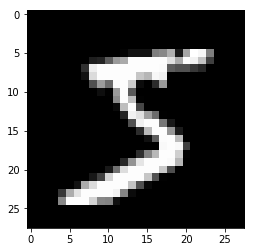

In [6]:
plt.imshow(img.reshape((28, 28)), cmap='gray')

# Initial Python Model

In [7]:
weights = np.random.randn(784, 10); weights.shape

(784, 10)

In [8]:
bias = np.zeros(10); bias.shape

(10,)

# Elementwise ops

In [9]:
def matmul1(a, b):
    ar, ac = a.shape # n_rows x n_cols
    br, bc = b.shape
    assert ac==br
    c = np.zeros((ar, bc))
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i, j] += a[i, k] * b[k, j]
    return c

In [10]:
m1 = x_test[:5]
m2 = weights

In [11]:
m1.shape, m2.shape

((5, 784), (784, 10))

In [12]:
%timeit -n 10 t1=matmul1(m1, m2)

134 ms ± 641 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
def matmul2(a, b):
    ar, ac = a.shape # n_rows x n_cols
    br, bc = b.shape
    assert ac==br
    c = np.zeros((ar, bc))
    for i in range(ar):
        for j in range(bc):
            c[i, j] = (a[i, :] * b[:, j]).sum()

    return c

Difference between time and timeit ---> see here: https://stackoverflow.com/questions/17579357/time-time-vs-timeit-timeit

In [14]:
%timeit -n 10 t2=matmul2(m1, m2)

476 µs ± 23.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
# time improvement:
143.0/0.5

286.0

In [16]:
def near(a, b): return np.allclose(a, b, rtol=1.e-3, atol=1.e-5)

In [17]:
near(matmul1(m1, m2), matmul2(m1, m2))

True

# Broadcasting

In [18]:
a = tf.constant([10., 6., -4.])
a

<tf.Tensor: id=0, shape=(3,), dtype=float32, numpy=array([10.,  6., -4.], dtype=float32)>

In [19]:
a > 0

<tf.Tensor: id=2, shape=(3,), dtype=bool, numpy=array([ True,  True, False])>

In [20]:
a + 1

<tf.Tensor: id=4, shape=(3,), dtype=float32, numpy=array([11.,  7., -3.], dtype=float32)>

In [21]:
m = tf.reshape(tf.range(1, 10, 1, dtype=tf.float32), [3, 3])
m

<tf.Tensor: id=13, shape=(3, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float32)>

In [22]:
2*m

<tf.Tensor: id=15, shape=(3, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.],
       [14., 16., 18.]], dtype=float32)>

Broadcasting a vector to a matrix

In [23]:
c = tf.constant([10., 20., 30.])

In [24]:
m.shape, c.shape

(TensorShape([3, 3]), TensorShape([3]))

In [25]:
# broadcast the row at each row of the matrix
m + c

<tf.Tensor: id=17, shape=(3, 3), dtype=float32, numpy=
array([[11., 22., 33.],
       [14., 25., 36.],
       [17., 28., 39.]], dtype=float32)>

In [26]:
c[..., None]

<tf.Tensor: id=21, shape=(3, 1), dtype=float32, numpy=
array([[10.],
       [20.],
       [30.]], dtype=float32)>

In [27]:
c[None, ...]

<tf.Tensor: id=25, shape=(1, 3), dtype=float32, numpy=array([[10., 20., 30.]], dtype=float32)>

In [28]:
c.shape, c[None, ...].shape, c[..., None].shape

(TensorShape([3]), TensorShape([1, 3]), TensorShape([3, 1]))

In [29]:
# brodcast on columns of m
m + c[:, None]

<tf.Tensor: id=38, shape=(3, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [24., 25., 26.],
       [37., 38., 39.]], dtype=float32)>

In [30]:
# broadcast on rows of m
m + c[None, :]

<tf.Tensor: id=43, shape=(3, 3), dtype=float32, numpy=
array([[11., 22., 33.],
       [14., 25., 36.],
       [17., 28., 39.]], dtype=float32)>

In [31]:
def matmul3(a, b):
    ar, ac = a.shape # n_rows x n_cols
    br, bc = b.shape
    assert ac==br
    c = np.zeros((ar, bc))
    for i in range(ar):        
        c[i] = (a[i][..., None] * b).sum(axis=0)

    return c

In [32]:
%timeit -n 10 _=matmul3(m1, m2)

206 µs ± 6.46 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
# time improvements
135./0.22

613.6363636363636

Broadcasting Rules

In [34]:
c[None, ...]

<tf.Tensor: id=47, shape=(1, 3), dtype=float32, numpy=array([[10., 20., 30.]], dtype=float32)>

In [35]:
c[None, ...].shape

TensorShape([1, 3])

In [36]:
c[..., None].shape

TensorShape([3, 1])

In [37]:
c[..., None] * c[None, ...]

<tf.Tensor: id=64, shape=(3, 3), dtype=float32, numpy=
array([[100., 200., 300.],
       [200., 400., 600.],
       [300., 600., 900.]], dtype=float32)>

In [38]:
c[...,None] * m

<tf.Tensor: id=69, shape=(3, 3), dtype=float32, numpy=
array([[ 10.,  20.,  30.],
       [ 80., 100., 120.],
       [210., 240., 270.]], dtype=float32)>

When operating on two arrays/tensors, numpy compares their shapes element wise. It starts with the trailing dimensions
, and works its way forward. Two dimensions are compatible when:

    1. they are equal or
    2. one of them is 1, in which case that dimension is broadcasted to make it the same size.
    
Arrays do not have the same number of dimensions. For example, if you have 256 x 256 x 3 array of RGB values, and you want to scale each color in the image by a diffrent value, you can multiply the image by a
one-dimensional array with 3 values. Lining up the sizes of the trailing axes of these arrays according 
to the broadcast rules, shows that they are compatible:

    Image  (3d array): 256 x 256 x 3
    Scale  (1d array):             3
    Result (3d array): 256 x 256 x 3

In [39]:
a = tf.reshape(tf.constant(tf.range(0, 27, 1, dtype=tf.float32)), [3, 3, 3])
a

<tf.Tensor: id=78, shape=(3, 3, 3), dtype=float32, numpy=
array([[[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.]],

       [[ 9., 10., 11.],
        [12., 13., 14.],
        [15., 16., 17.]],

       [[18., 19., 20.],
        [21., 22., 23.],
        [24., 25., 26.]]], dtype=float32)>

In [40]:
scale = tf.constant([2., 3., 4.])

In [41]:
a.shape, scale[None, None].shape

(TensorShape([3, 3, 3]), TensorShape([1, 1, 3]))

In [42]:
scale

<tf.Tensor: id=79, shape=(3,), dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [43]:
a * scale

<tf.Tensor: id=84, shape=(3, 3, 3), dtype=float32, numpy=
array([[[  0.,   3.,   8.],
        [  6.,  12.,  20.],
        [ 12.,  21.,  32.]],

       [[ 18.,  30.,  44.],
        [ 24.,  39.,  56.],
        [ 30.,  48.,  68.]],

       [[ 36.,  57.,  80.],
        [ 42.,  66.,  92.],
        [ 48.,  75., 104.]]], dtype=float32)>

In [44]:
a[:,:, 0]

<tf.Tensor: id=88, shape=(3, 3), dtype=float32, numpy=
array([[ 0.,  3.,  6.],
       [ 9., 12., 15.],
       [18., 21., 24.]], dtype=float32)>

In [45]:
a

<tf.Tensor: id=78, shape=(3, 3, 3), dtype=float32, numpy=
array([[[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.]],

       [[ 9., 10., 11.],
        [12., 13., 14.],
        [15., 16., 17.]],

       [[18., 19., 20.],
        [21., 22., 23.],
        [24., 25., 26.]]], dtype=float32)>

In [46]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [47]:
m1 = tf.constant(x_test[:5], dtype=tf.float32)
m2 = tf.constant(weights, dtype=tf.float32)

with tf.device('/CPU:0'):    
    %timeit -n 10 tf.matmul(m1, m2)

The slowest run took 38.27 times longer than the fastest. This could mean that an intermediate result is being cached.
339 µs ± 698 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
m1 = tf.constant(x_test[:5], dtype=tf.float32)
m2 = tf.constant(weights, dtype=tf.float32)

with tf.device('/GPU:0'):    
    %timeit -n 10 tf.matmul(m1, m2)

The slowest run took 372.29 times longer than the fastest. This could mean that an intermediate result is being cached.
12.2 ms ± 29.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
